In [33]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [7]:
# tfds.list_builders()

In [8]:
data_dir = 'D:\\Sandbox\\Github\\DATA_TFDS'

In [35]:
dataset, info = tfds.load(name='cifar10',
                              #split=['train', 'test'], 
                              data_dir=data_dir, 
                              with_info=True,
                              as_supervised=True, # mutually exclusive with split
                              shuffle_files=True,
                              download=False)

In [67]:
print(info.features["label"].names)
print(info.features["label"].int2str(7))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
horse


In [63]:
train_dataset, test_dataset = dataset['train'], dataset['test']

,image,label
0,,7 (horse)
1,,8 (ship)
2,,4 (deer)
3,,4 (deer)
4,,6 (frog)

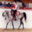
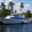
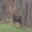
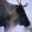
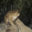

In [64]:
tfds.as_dataframe(train_dataset.take(5), info)

In [58]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

### Prepare data for Model

In [65]:
BATCH_SIZE = 32
TRAIN_SIZE = len(train_dataset)   # memory max = 1000
# if repeat() then model needs epoch/step
#train_dataset = #train_dataset.cache().repeat().shuffle(TRAIN_SIZE).batch(BATCH_SIZE).prefetch(TRAIN_SIZE)

train_dataset = train_dataset.map(normalize).cache().shuffle(TRAIN_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(normalize).batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

### Prepare data for Prediction analysis

In [52]:
# data is batch sized
for test_images, test_labels in test_dataset.take(1):
  x_test = test_images.numpy()
  y_test = test_labels.numpy()

airplane


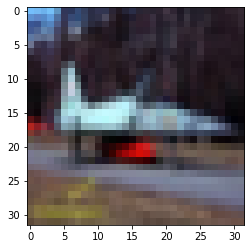

In [51]:
n = 4
plt.imshow(x_test[n])
print(info.features["label"].int2str(y_test[n]))